In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class AmazonSalesAnalysis:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = None
        self.monthly_sales = None
        self.yearly_sales = None
        self.monthly_sales_trend = None

    def extract_data(self):
        self.df = pd.read_csv(self.file_path)
        print("Column names:", self.df.columns)
        print("First few rows:\n", self.df.head())

    def transform_data(self):
        self.df['Order Date'] = pd.to_datetime(self.df['Order Date'])
        self.df['Month'] = self.df['Order Date'].dt.month
        self.df['Year'] = self.df['Order Date'].dt.year

        # Ensure 'Total Revenue' and other financial columns are numeric
        self.df['Total Revenue'] = pd.to_numeric(self.df['Total Revenue'], errors='coerce')
        self.df['Total Profit'] = pd.to_numeric(self.df['Total Profit'], errors='coerce')
        self.df['Total Cost'] = pd.to_numeric(self.df['Total Cost'], errors='coerce')

        # Drop rows with NaN values in critical columns
        self.df = self.df.dropna(subset=['Total Revenue', 'Total Profit', 'Total Cost'])
        
        self.monthly_sales = self.df.groupby(['Year', 'Month'])['Total Revenue'].sum().reset_index()
        self.yearly_sales = self.df.groupby('Year')['Total Revenue'].sum().reset_index()
        self.monthly_sales_trend = self.df.groupby('Month')['Total Revenue'].sum().reset_index()

    def load_data(self):
        self.df.to_csv('transformed_data.csv', index=False)
        self.monthly_sales.to_csv('monthly_sales.csv', index=False)
        self.yearly_sales.to_csv('yearly_sales.csv', index=False)
        self.monthly_sales_trend.to_csv('monthly_sales_trend.csv', index=False)

    def plot_monthly_sales_trend(self):
        plt.figure(figsize=(14, 7))
        sns.lineplot(x='Month', y='Total Revenue', hue='Year', data=self.monthly_sales)
        plt.title('Monthly Sales Trend by Year')
        plt.xlabel('Month')
        plt.ylabel('Total Revenue')
        plt.show()

    def plot_yearly_sales(self):
        plt.figure(figsize=(14, 7))
        sns.barplot(x='Year', y='Total Revenue', data=self.yearly_sales)
        plt.title('Yearly Sales')
        plt.xlabel('Year')
        plt.ylabel('Total Revenue')
        plt.show()

    def plot_yearly_monthly_sales_trend(self):
        yearly_monthly_trend = self.df.pivot_table(index='Month', columns='Year', values='Total Revenue', aggfunc='sum').fillna(0).reset_index()
        plt.figure(figsize=(14, 7))
        for year in yearly_monthly_trend.columns[1:]:
            plt.plot(yearly_monthly_trend['Month'], yearly_monthly_trend[year], label=year)
        plt.legend(title='Year')
        plt.title('Yearly Monthly Sales Trend')
        plt.xlabel('Month')
        plt.ylabel('Total Revenue')
        plt.show()

    def plot_correlation_matrix(self):
        numeric_df = self.df.select_dtypes(include=[float, int])
        correlation_matrix = numeric_df.corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
        plt.title('Correlation Matrix')
        plt.show()

    def key_metrics(self):
        total_revenue = self.df['Total Revenue'].sum()
        total_profit = self.df['Total Profit'].sum()
        total_orders = self.df.shape[0]
        average_order_value = self.df['Total Revenue'].mean()
        
        print(f"Total Revenue: ${total_revenue:,.2f}")
        print(f"Total Profit: ${total_profit:,.2f}")
        print(f"Total Orders: {total_orders}")
        print(f"Average Order Value: ${average_order_value:,.2f}")

    def sales_by_category(self):
            category_sales = self.df.groupby('Item Type')['Total Revenue'].sum().reset_index()
            plt.figure(figsize=(14, 7))
            sns.barplot(x='Total Revenue', y='Item Type', data=category_sales.sort_values(by='Total Revenue', ascending=False))
            plt.title('Sales by Item Type')
            plt.xlabel('Total Revenue')
            plt.ylabel('Item Type')
            plt.show()
        
    def sales_by_region(self):
            region_sales = self.df.groupby('Region')['Total Revenue'].sum().reset_index()
            plt.figure(figsize=(14, 7))
            sns.barplot(x='Total Revenue', y='Region', data=region_sales.sort_values(by='Total Revenue', ascending=False))
            plt.title('Sales by Region')
            plt.xlabel('Total Revenue')
            plt.ylabel('Region')
            plt.show()

    def sales_channel_performance(self):
            channel_sales = self.df.groupby('Sales Channel')[['Total Revenue', 'Total Profit', 'Units Sold']].sum().reset_index()
            plt.figure(figsize=(14, 7))
            sns.barplot(x='Total Revenue', y='Sales Channel', data=channel_sales.sort_values(by='Total Revenue', ascending=False))
            plt.title('Sales Performance by Channel')
            plt.xlabel('Total Revenue')
            plt.ylabel('Sales Channel')
            plt.show()

    def order_priority_impact(self):
            priority_sales = self.df.groupby('Order Priority')[['Total Revenue', 'Total Profit']].sum().reset_index()
            plt.figure(figsize=(14, 7))
            sns.barplot(x='Total Revenue', y='Order Priority', data=priority_sales.sort_values(by='Total Revenue', ascending=False))
            plt.title('Impact of Order Priority on Sales')
            plt.xlabel('Total Revenue')
            plt.ylabel('Order Priority')
            plt.show()
    
    def sales_growth_analysis(self):
        self.df.set_index('Order Date', inplace=True)
        monthly_revenue = self.df.resample('M')['Total Revenue'].sum()

        # Calculate Month-over-Month (MoM) Growth
        mom_growth = monthly_revenue.pct_change().dropna()
        
        plt.figure(figsize=(14, 7))
        plt.plot(mom_growth.index, mom_growth.values, marker='o', linestyle='-')
        plt.title('Month-over-Month Sales Growth')
        plt.xlabel('Month')
        plt.ylabel('Growth Rate')
        plt.show()

        # Calculate Year-over-Year (YoY) Growth
        ytd_revenue = self.df.resample('A')['Total Revenue'].sum()
        yoy_growth = ytd_revenue.pct_change().dropna()

        plt.figure(figsize=(14, 7))
        plt.plot(yoy_growth.index, yoy_growth.values, marker='o', linestyle='-')
        plt.title('Year-over-Year Sales Growth')
        plt.xlabel('Year')
        plt.ylabel('Growth Rate')
        plt.show()

    def revenue_distribution_analysis(self):
        plt.figure(figsize=(14, 7))
        sns.histplot(self.df['Total Revenue'], bins=30, kde=True)
        plt.title('Revenue Distribution per Order')
        plt.xlabel('Total Revenue')
        plt.ylabel('Frequency')
        plt.show()

    def sales_contribution_analysis(self):
            region_sales = self.df.groupby('Region')['Total Revenue'].sum().reset_index()
            region_sales['Contribution (%)'] = 100 * region_sales['Total Revenue'] / region_sales['Total Revenue'].sum()
            
            plt.figure(figsize=(14, 7))
            sns.barplot(x='Contribution (%)', y='Region', data=region_sales.sort_values(by='Contribution (%)', ascending=False))
            plt.title('Sales Contribution by Region')
            plt.xlabel('Contribution (%)')
            plt.ylabel('Region')
            plt.show()
        
            category_sales = self.df.groupby('Item Type')['Total Revenue'].sum().reset_index()
            category_sales['Contribution (%)'] = 100 * category_sales['Total Revenue'] / category_sales['Total Revenue'].sum()
            
            plt.figure(figsize=(14, 7))
            sns.barplot(x='Contribution (%)', y='Item Type', data=category_sales.sort_values(by='Contribution (%)', ascending=False))
            plt.title('Sales Contribution by Item Type')
            plt.xlabel('Contribution (%)')
            plt.ylabel('Item Type')
            plt.show()

    def run_etl(self):
        self.extract_data()
        self.transform_data()
        self.load_data()



In [2]:
df = pd.read_csv('Amazon Sales data.csv')

In [3]:
if __name__ == "__main__":
    analysis = AmazonSalesAnalysis('Amazon Sales data.csv')
    analysis.run_etl()
    
    # Now you can call any analysis function and it will show the plot right away
   

Column names: Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')
First few rows:
                               Region                Country        Item Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

  Sales Channel Order Priority Order Date   Order ID  Ship Date  Units Sold  \
0       Offline              H  5/28/2010  669165933  6/27/2010        9925   
1        Online              C  8/22/2012  963881480  9/15/2012        2804   
2       Off

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


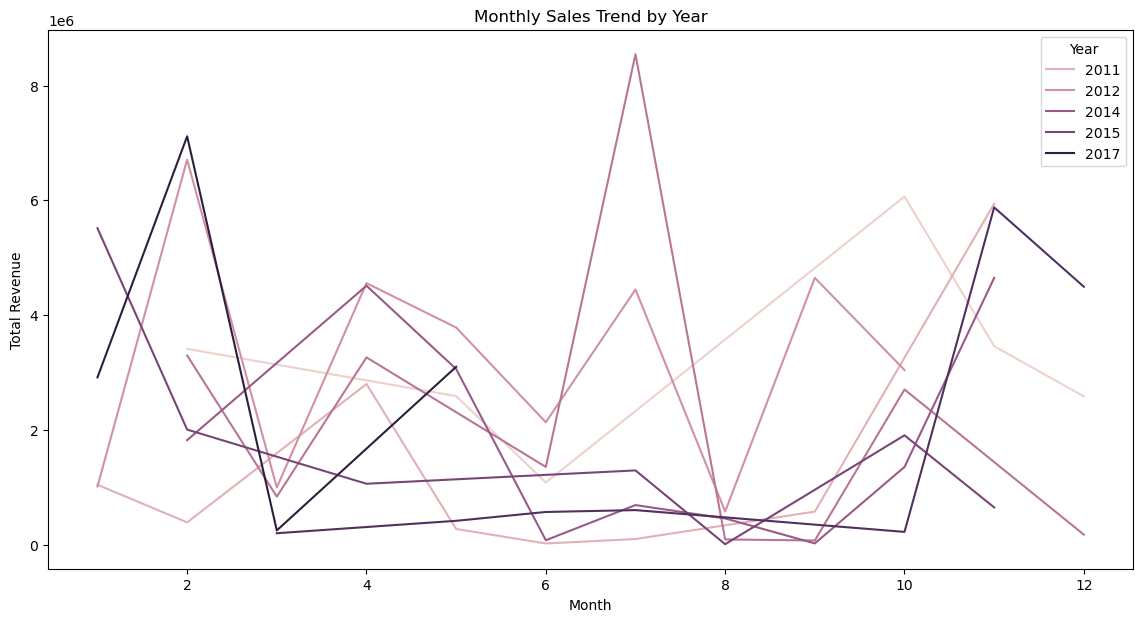

In [4]:
 analysis.plot_monthly_sales_trend()
    

There is a clear seasonal pattern with peaks and troughs observed across all years. The sales generally peak around the end of the year (November/December), indicating higher sales during the holiday season. 

There are also smaller peaks around the middle of the year (June/July) for some years.there are variations in the overall sales levels from year to year. For example, 2015 and 2017 appear to have higher sales compared to the other years shown.

The peak sales in 2017 seem to be higher than the peak sales in 2011, suggesting an overall growth in sales over the years.

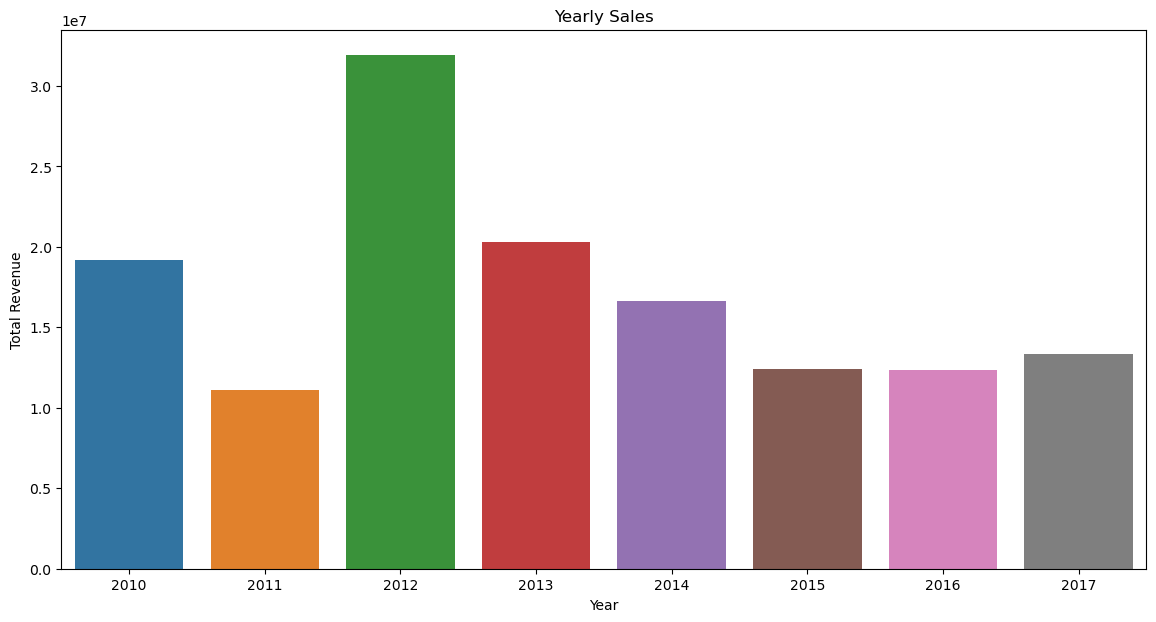

In [5]:
analysis.plot_yearly_sales()
   

This bar graph displays the yearly sales for a business or organization from 2010 to 2017. The sales peaked in 2012, followed by a decline in subsequent years, with 2017 showing the lowest sales among the years presented. The graph highlights the importance of analyzing year-over-year sales trends to identify potential growth opportunities or areas requiring improvement in sales strategies and operations.

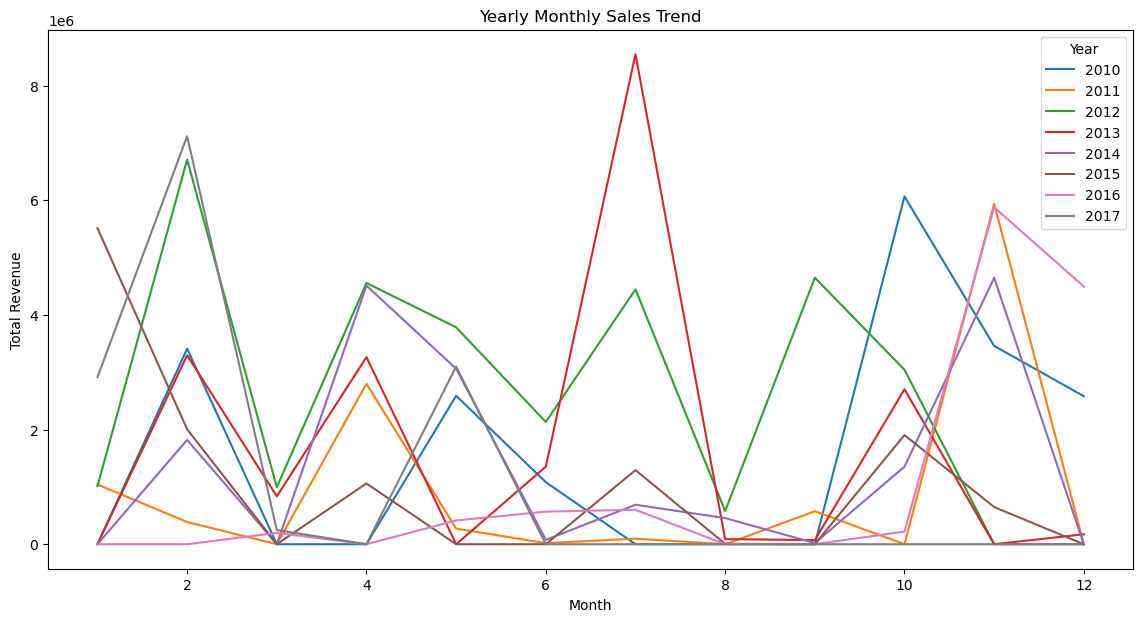

In [6]:
analysis.plot_yearly_monthly_sales_trend()
    

This line plot depicts the yearly monthly sales trend over multiple years. It shows a consistent pattern of sales peaking towards the end of each year, likely due to the holiday season. 

However, there are variations in the peak sales values across different years, indicating potential changes in market conditions or business performance over time. 

The graph allows for the identification of seasonal patterns and year-over-year comparisons to inform sales strategies and resource allocation.

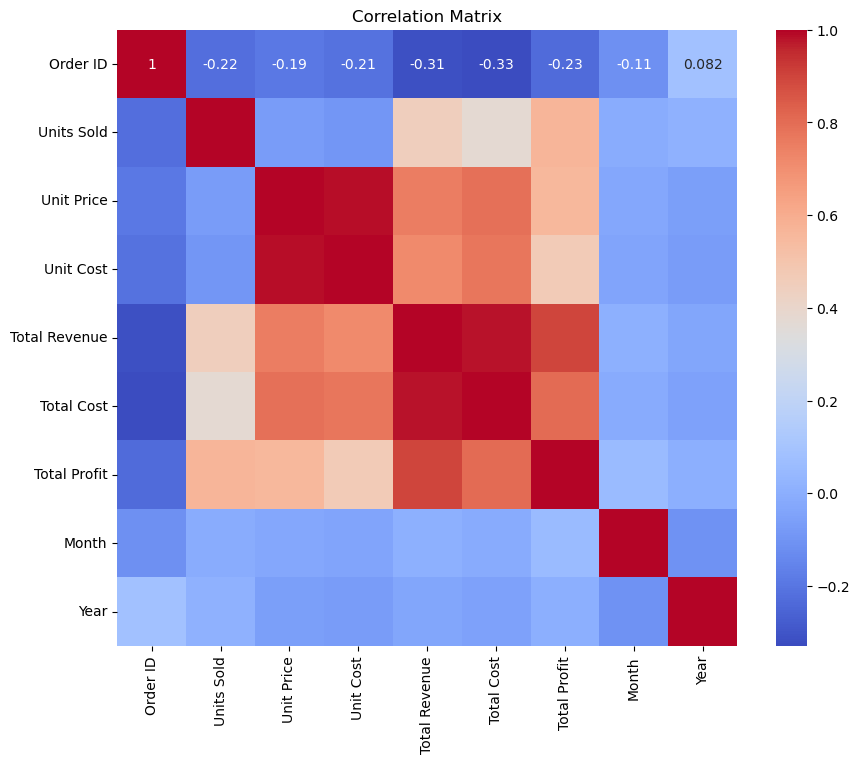

In [7]:
analysis.plot_correlation_matrix()
   

This correlation matrix displays the relationships between various numerical variables in the dataset.

The darker red shades indicate strong positive correlations, while darker blue shades represent strong negative correlations. 

Some key insights are: Order ID is negatively correlated with most variables, suggesting higher order IDs may have lower values. 

Units Sold and Total Revenue are highly positively correlated, as expected.

In [8]:
 analysis.key_metrics()
   

Total Revenue: $137,348,768.31
Total Profit: $44,168,198.40
Total Orders: 100
Average Order Value: $1,373,487.68


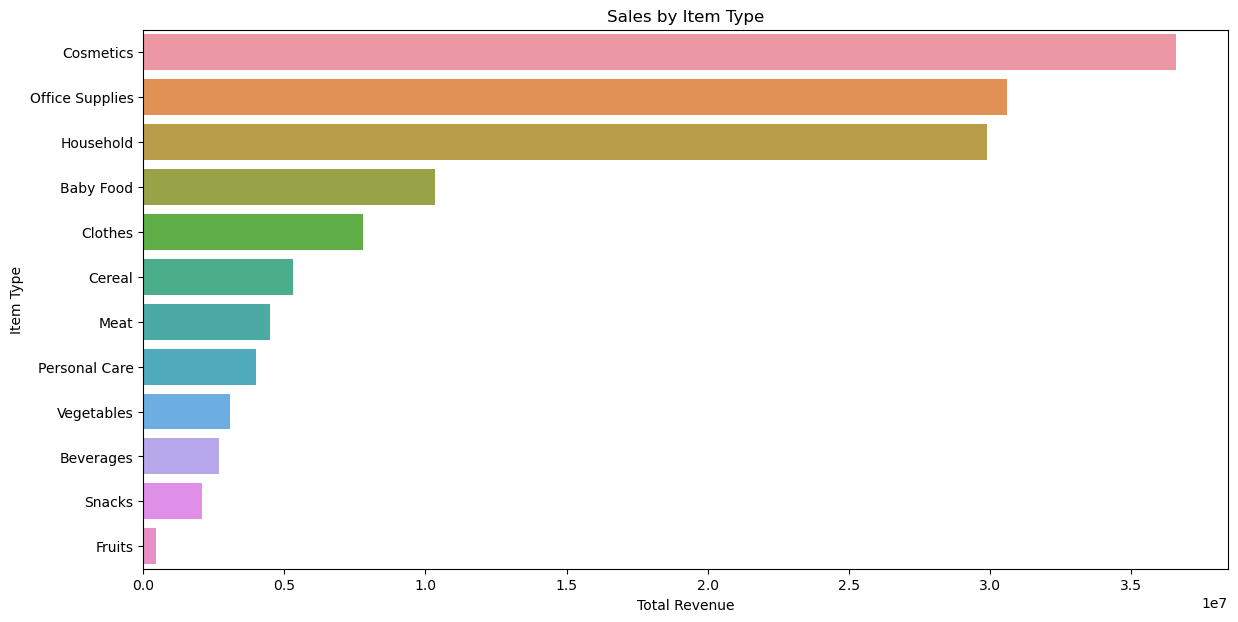

In [9]:
analysis.sales_by_category()

The bar graph  highlights the sales distribution across different item types. **Cosmetics** stand out as the top-selling category, significantly outperforming other items like office supplies and household goods. On the other end, **fruits** register the lowest sales, suggesting a potential area for marketing focus or inventory adjustment. This visual data can inform strategic decisions to optimize sales performance across categories.

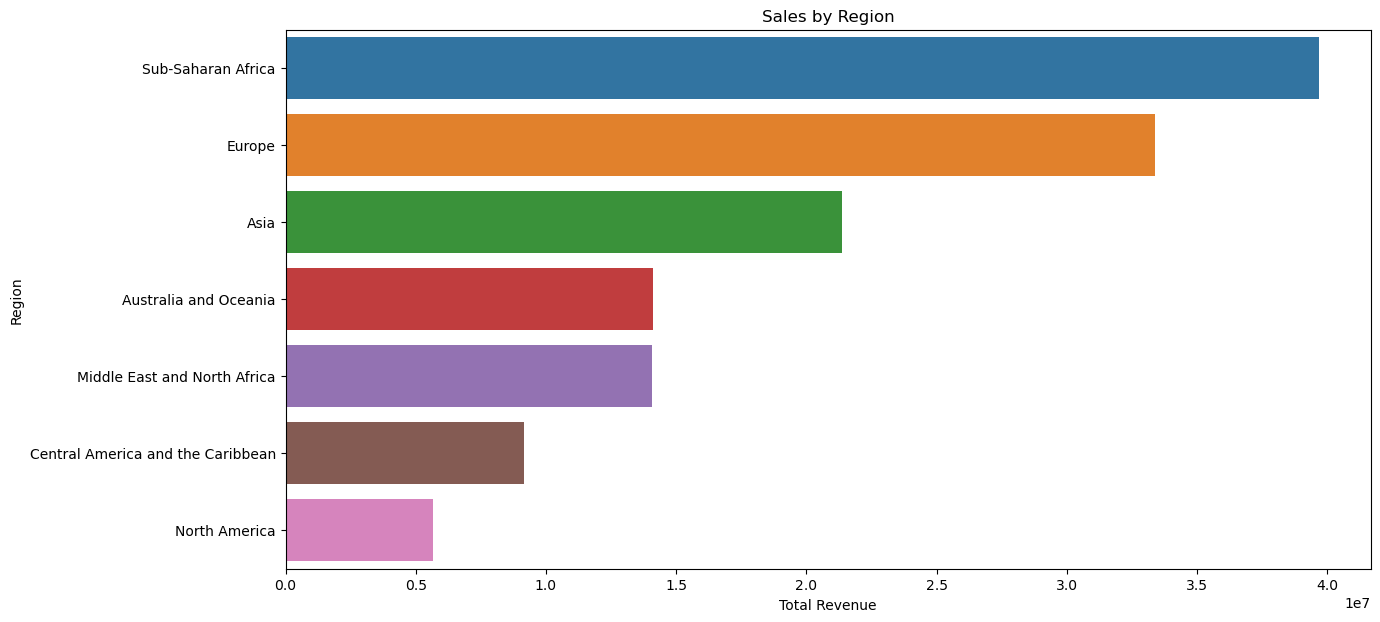

In [10]:
analysis.sales_by_region()

The "Sales by Region" bar graph illustrates that **Sub-Saharan Africa** is the leading region in sales, outpacing Europe and Asia. Conversely, **North America** shows the least sales among the regions displayed. This data suggests a strong market presence in Sub-Saharan Africa and potential growth opportunities in North America.

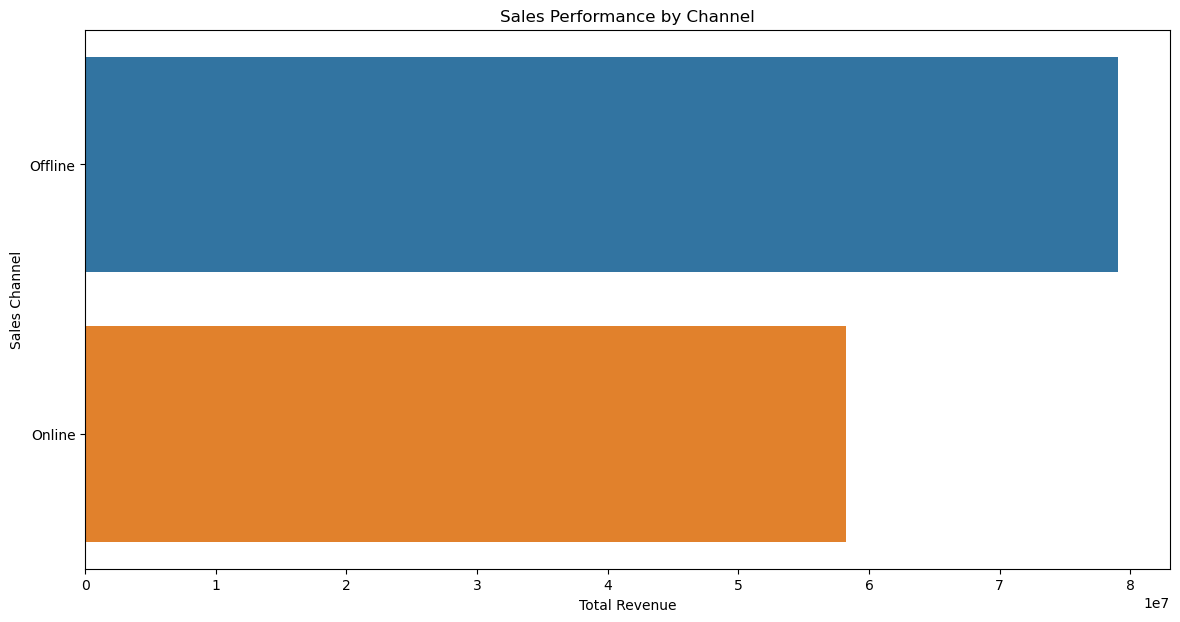

In [11]:
analysis.sales_channel_performance()

The bar graph indicates a stark contrast between the **offline** and **online** sales channels. Offline sales significantly outperform online sales, suggesting that the offline channel is the primary revenue driver for this business. This insight could be pivotal for strategic planning, especially in optimizing the online sales channel to enhance overall revenue.

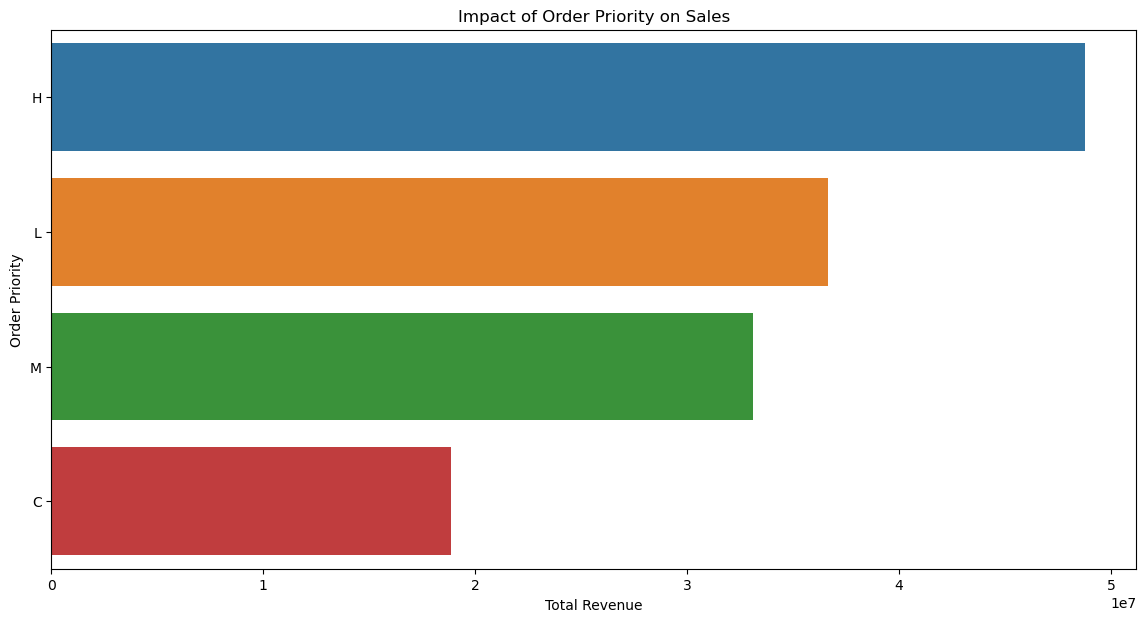

In [12]:
analysis.order_priority_impact()

The bar graph reveals that orders with the highest priority (**H**) generate the most total revenue, significantly surpassing lower priority orders (**L**, **M**, **C**). This suggests that prioritizing orders can have a substantial impact on sales, with high-priority orders driving the majority of the revenue. It highlights the importance of an effective order prioritization system to maximize sales outcomes.

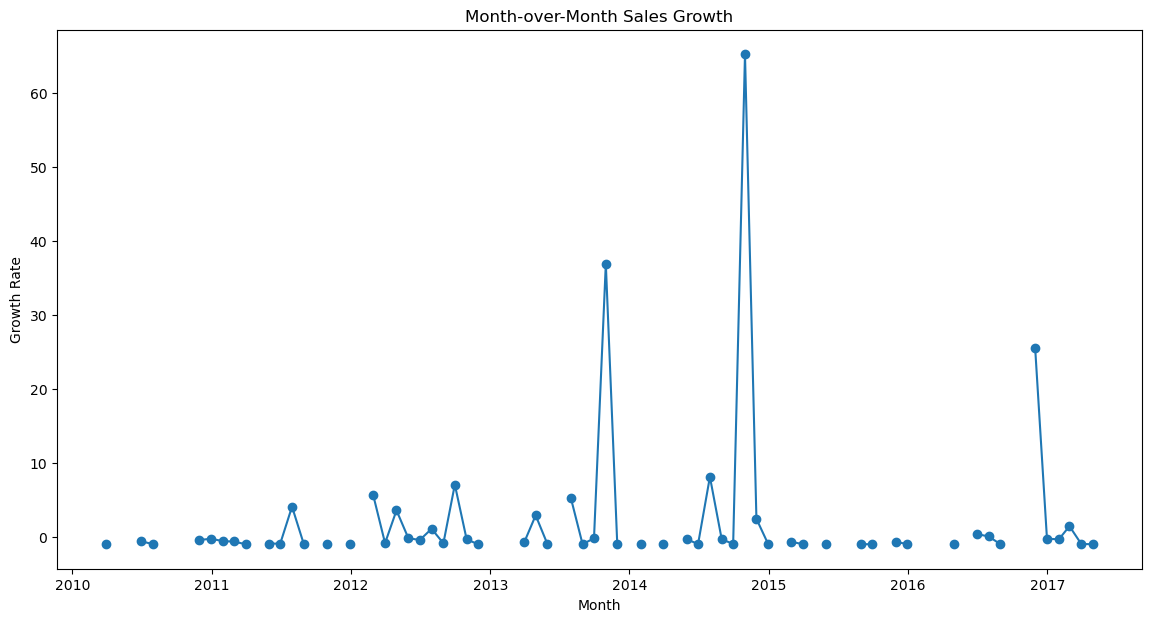

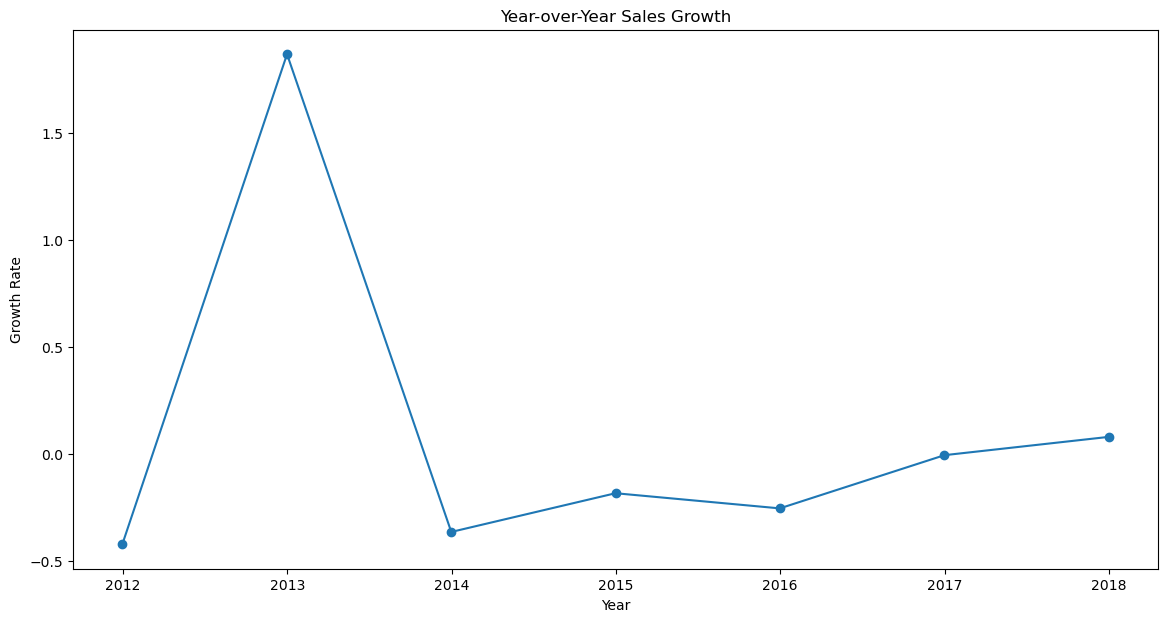

In [13]:
analysis.sales_growth_analysis()

The line graph In first Figure shows the **Month-over-Month Sales Growth** from 2010 to 2017. The data indicates significant growth spikes in **2013**, **2014**, and **2016**. These peaks suggest periods of successful sales strategies or market conditions that could be analyzed for replicable tactics. However, most other points indicate a growth rate close to zero, implying stability or stagnation outside of peak periods.

The Secong line graph depicts **Year-over-Year Sales Growth** from 2012 to 2018. A notable peak in 2014 suggests a period of significant growth, followed by a downturn in 2015 where growth fell below zero. Subsequently, there's a steady recovery and increase from 2016 to 2018. This pattern could indicate market volatility and the need for adaptive strategies to maintain growth momentum.

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


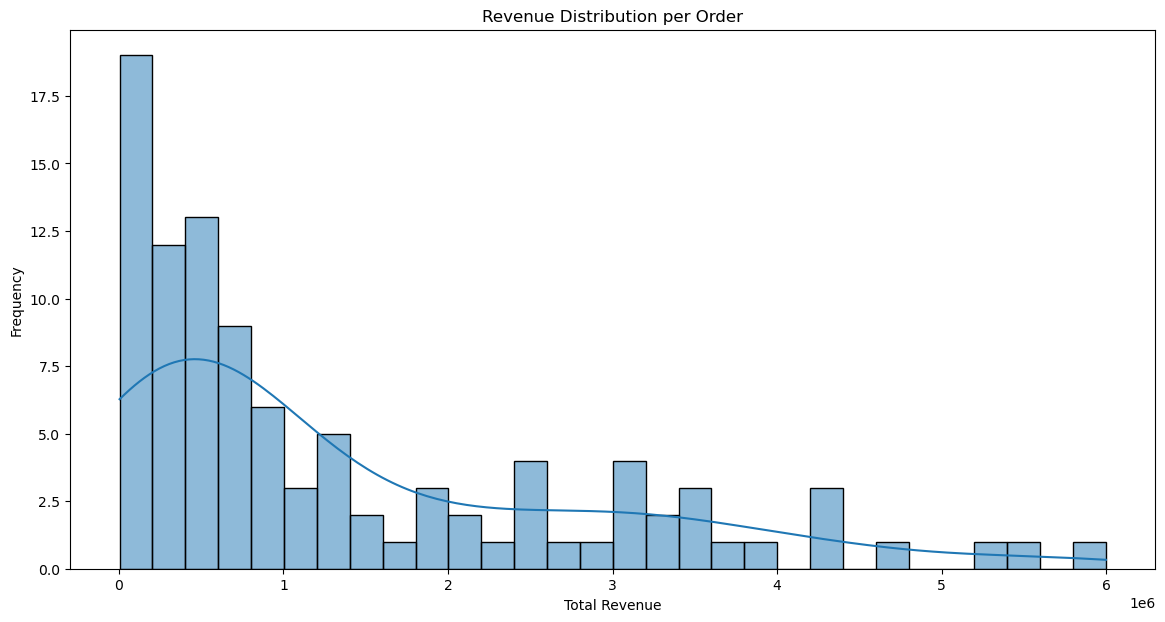

In [14]:
analysis.revenue_distribution_analysis()

The histogram showcases the **Revenue Distribution per Order**, highlighting that the majority of orders fall within the 0 to 1 million revenue range. As the revenue per order increases, the frequency of such orders decreases, indicating that higher revenue orders are less common. This trend suggests a concentration of smaller transactions, which could be a focus area for strategies aiming to increase the average revenue per order.

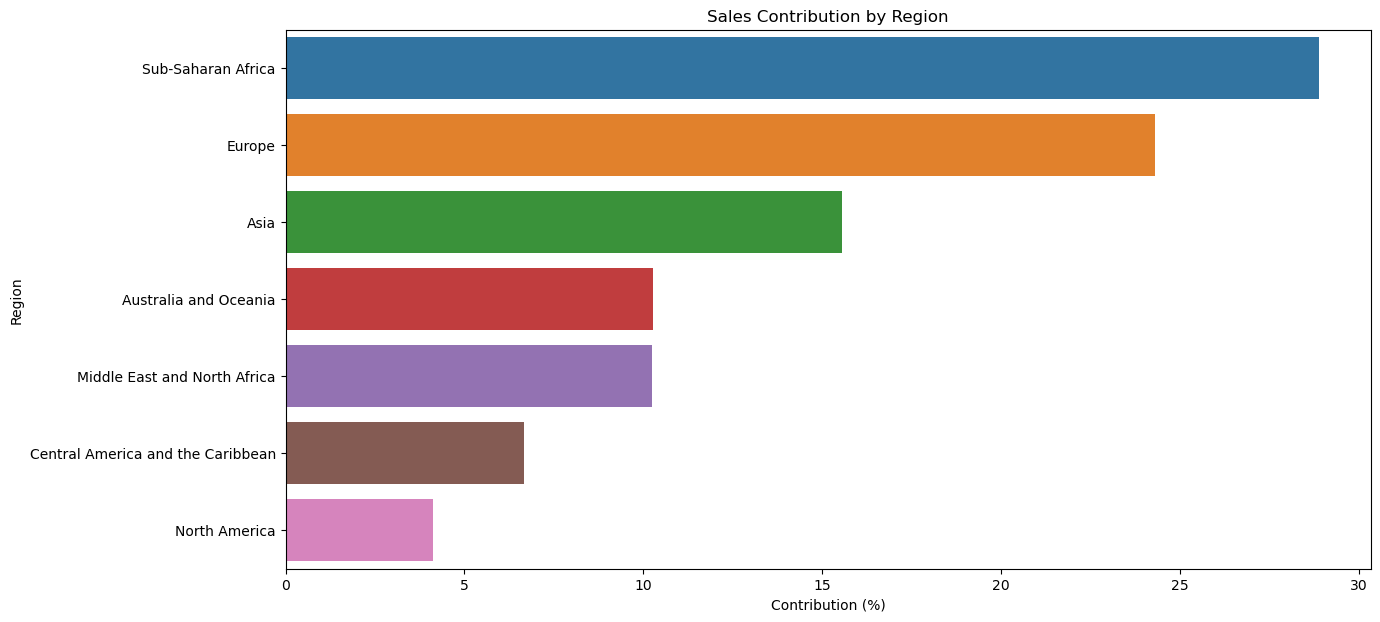

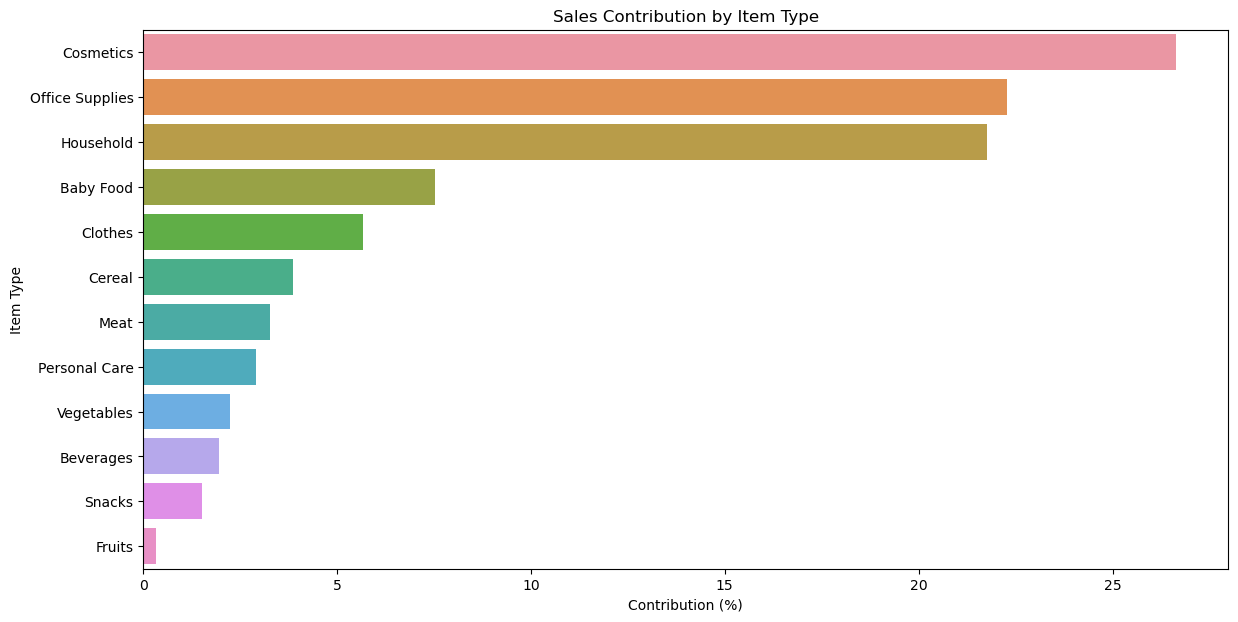

In [15]:
 analysis.sales_contribution_analysis()

The bar graph titled "Sales Contribution by Region" shows that **Sub-Saharan Africa** dominates sales contributions, with a significant margin over other regions. Europe and Asia follow, each contributing around 10% to sales. The remaining regions, including North America, have notably lower sales contributions. This data could be crucial for businesses to strategize their market focus and resource allocation.

In [16]:
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html, Input, Output
import dash_bootstrap_components as dbc

In [17]:

# Transform the data
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

# Ensure 'Total Revenue' and other financial columns are numeric
df['Total Revenue'] = pd.to_numeric(df['Total Revenue'], errors='coerce')
df['Total Profit'] = pd.to_numeric(df['Total Profit'], errors='coerce')
df['Total Cost'] = pd.to_numeric(df['Total Cost'], errors='coerce')

# Drop rows with NaN values in critical columns
df = df.dropna(subset=['Total Revenue', 'Total Profit', 'Total Cost'])

# Initialize the Dash app
app = Dash(__name__)

# Define the layout
app.layout = html.Div([
    html.H1("Amazon Sales Dashboard"),
    html.Div([
        html.Label('Select Region:'),
        dcc.Dropdown(
            id='region-filter',
            options=[{'label': region, 'value': region} for region in df['Region'].unique()],
            multi=True,
            value=[]
        ),
    ], style={'width': '30%', 'display': 'inline-block'}),
    html.Div([
        html.Label('Select Category:'),
        dcc.Dropdown(
            id='category-filter',
            options=[{'label': category, 'value': category} for category in df['Item Type'].unique()],
            multi=True,
            value=[]
        ),
    ], style={'width': '30%', 'display': 'inline-block', 'marginLeft': '10px'}),
    html.Div([
        html.Label('Select Timeframe:'),
        dcc.DatePickerRange(
            id='date-filter',
            start_date=df['Order Date'].min(),
            end_date=df['Order Date'].max()
        ),
    ], style={'width': '30%', 'display': 'inline-block', 'marginLeft': '10px'}),
    html.Div([
        dcc.Graph(id='monthly-sales-trend'),
        dcc.Graph(id='yearly-sales'),
        dcc.Graph(id='sales-growth-analysis'),
    ])
])

# Define callbacks to update the graphs based on filters
@app.callback(
    [Output('monthly-sales-trend', 'figure'),
     Output('yearly-sales', 'figure'),
     Output('sales-growth-analysis', 'figure')],
    [Input('region-filter', 'value'),
     Input('category-filter', 'value'),
     Input('date-filter', 'start_date'),
     Input('date-filter', 'end_date')]
)
def update_charts(selected_regions, selected_categories, start_date, end_date):
    # Filter the DataFrame based on the selected filters
    filtered_df = df[
        (df['Order Date'] >= start_date) & 
        (df['Order Date'] <= end_date)
    ]
    
    if selected_regions:
        filtered_df = filtered_df[filtered_df['Region'].isin(selected_regions)]
    if selected_categories:
        filtered_df = filtered_df[filtered_df['Item Type'].isin(selected_categories)]

    # Check if filtered DataFrame is empty
    if filtered_df.empty:
        empty_figure = {
            'data': [],
            'layout': {
                'title': 'No data available for the selected filters'
            }
        }
        return empty_figure, empty_figure, empty_figure

    # Group data for the plots
    monthly_sales = filtered_df.groupby(['Year', 'Month'])['Total Revenue'].sum().reset_index()
    yearly_sales = filtered_df.groupby('Year')['Total Revenue'].sum().reset_index()
    monthly_revenue = filtered_df.set_index('Order Date').resample('M')['Total Revenue'].sum()

    # Calculate Month-over-Month (MoM) Growth
    mom_growth = monthly_revenue.pct_change().dropna()
    ytd_revenue = filtered_df.set_index('Order Date').resample('A')['Total Revenue'].sum()
    yoy_growth = ytd_revenue.pct_change().dropna()

    # Create the figures
    fig_monthly_sales = px.line(monthly_sales, x='Month', y='Total Revenue', color='Year', title='Monthly Sales Trend by Year')
    fig_yearly_sales = px.bar(yearly_sales, x='Year', y='Total Revenue', title='Yearly Sales')
    fig_mom_growth = px.line(mom_growth, x=mom_growth.index, y=mom_growth.values, title='Month-over-Month Sales Growth')
    fig_yoy_growth = px.line(yoy_growth, x=yoy_growth.index, y=yoy_growth.values, title='Year-over-Year Sales Growth')

    # Combine MoM and YoY growth figures in one plot
    fig_sales_growth = {
        "data": fig_mom_growth.data + fig_yoy_growth.data,
        "layout": fig_mom_growth.layout.update(
            title='Sales Growth Analysis (MoM and YoY)',
            xaxis_title='Date',
            yaxis_title='Growth Rate'
        )
    }

    return fig_monthly_sales, fig_yearly_sales, fig_sales_growth

# Run the app
if __name__ == "__main__":
    app.run_server(debug=True)


C:\Users\hp\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:107: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\hp\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:107: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

